In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import datetime as dt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [20]:
crypto = 'BTC'
currency = "USD"

start = dt.datetime(2012,1,1)
end = dt.datetime.now()

data = yf.download(f"{crypto}-{currency}", start , end)

[*********************100%***********************]  1 of 1 completed


In [21]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-06-01,27218.412109,27346.105469,26671.720703,26819.972656,26819.972656,14678970415
2023-06-02,26824.556641,27303.861328,26574.644531,27249.589844,27249.589844,14837415000
2023-06-03,27252.324219,27317.052734,26958.003906,27075.128906,27075.128906,8385597470


<Axes: xlabel='Date'>

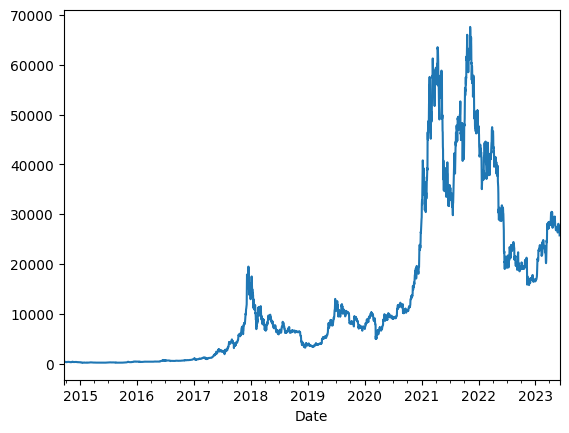

In [22]:
data["Close"].plot()

In [23]:
X = ["Open", "Volume"]
y = "Close"

In [24]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data[X], data[y], test_size=0.2, random_state=100)

numerical_features = data[X].select_dtypes(include=['float64', 'int64'])

numerical_columns = numerical_features.columns

ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

X_Train = ct.fit_transform(X_Train)
X_Test = ct.transform(X_Test)

In [25]:
model = xgb.XGBRegressor()

In [26]:
model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
pred = model.predict(X_Test)

print(pred)

[ 6129.664   25731.305     313.65347  1226.3969    276.11758   381.64484
  7127.691     313.65347  3473.4045    589.1515   8133.4214  61344.484
 44130.543    3670.584     644.84814 52571.926   16502.896    6506.711
   381.64484  6665.2993   5844.528     644.84814   705.4021  56878.29
 62292.98     9623.864     728.5218   3100.456     422.71985  8508.444
   251.78036 10306.254   43317.844   29057.396    2571.4673   8958.897
   422.71985 48663.39    10033.512    1226.3969    986.0699  17850.672
  2205.8445   7464.3145  32194.5     10046.29     2345.82     3978.5178
   454.54807 59305.168    4048.209   10196.984     379.03027  6908.4785
  8605.768    6538.9243    454.54807  9963.252     276.11758   261.8788
 11143.851     454.54807  5971.611     313.65347   261.8788   9425.784
  9270.915    6554.93      614.6729   8784.633     261.8788  56751.84
 26967.6      8301.567     431.6066    589.1515    355.42337   986.0699
 45067.645   10454.353   22141.41     3487.4194  23394.242     261.8788
 

In [28]:
accuracy = model.score(X_Test, Y_Test)

In [29]:
accuracy

0.9969995114419002

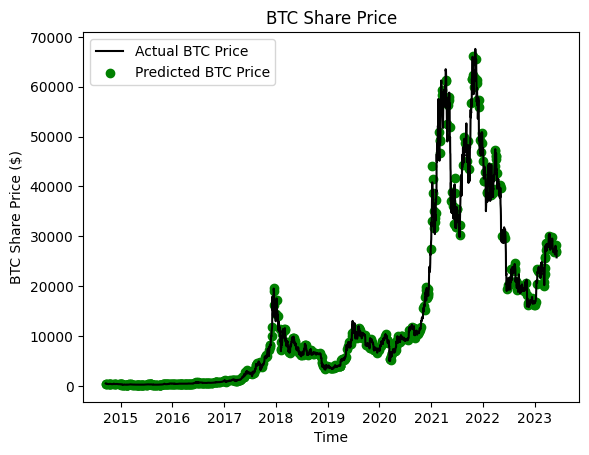

In [30]:
plt.plot(data["Close"], label = f"Actual {crypto} Price", color="black")
plt.scatter(Y_Test.index, pred, label = f"Predicted {crypto} Price", color="green", linewidths=1)
plt.title(f"{crypto} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{crypto} Share Price ($)")
plt.legend()
plt.show()

In [31]:
last_date = data.iloc[-1:]

In [32]:
last_date

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05,27123.109375,27129.982422,25445.167969,25760.097656,25760.097656,21513292646


In [33]:
real_pred = ct.transform(last_date[X])

In [34]:
model.predict(real_pred)

array([26224.838], dtype=float32)

In [35]:
import pickle as pkl

pkl.dump(model, open(f"{crypto}_lr_model.pkl", "wb"))

In [36]:
pkl.dump(ct, open(f"{crypto}_lr_scaler.pkl", "wb"))